In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib.pyplot as plt
import seaborn as sns
import contextily
import plotly.express as px

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = gpd.read_file('../raw_data/df_with_bez/merged_bez.shp')
df.dropna(inplace=True)

In [3]:
df = df.rename(
    columns={
        'BEZ': 'Bezirk',
        'child_pov': 'Child poverty',
        'mig_rate': 'Migration rate',
        'unemployme': 'Unemployment',
        'welfare': 'Social benefits',
        'ave_rent': 'Average rent',
        'social_hou': 'Social housing',
        'public_hou': 'Public housing'
    })

In [4]:
df.Bezirk = df.Bezirk.map({
    '01': 'Mitte',
    '02': 'Friedrichshain-Kreuzberg',
    '03': 'Pankow',
    '04': 'Charlottenburg-Wilmersdorf',
    '05': 'Spandau',
    '06': 'Steglitz-Zehlendorf',
    '07': 'Tempelhof-Schöneberg',
    '08': 'Neukölln',
    '09': 'Treptow-Köpenick',
    '10': 'Marzahn-Hellersdorf',
    '11': 'Lichtenberg',
    '12': 'Reinickendorf'
})

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/seab

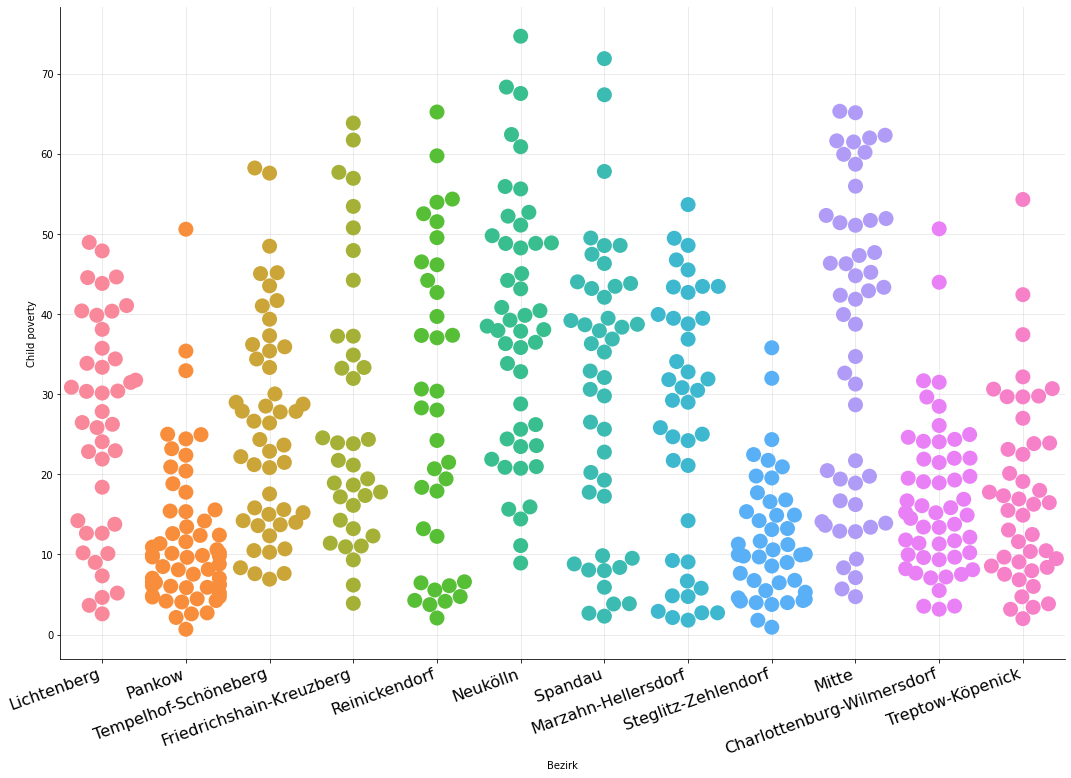

In [21]:
plt.figure(figsize=(18, 12))
ax = sns.swarmplot(df['Bezirk'], df['Child poverty'], size=15)
ax.grid(alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=20,
                   horizontalalignment='right', fontsize=16)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
plt.savefig(fname='plots/swarmplot.png',transparent=False, facecolor='white', bbox_inches="tight")

<AxesSubplot:>

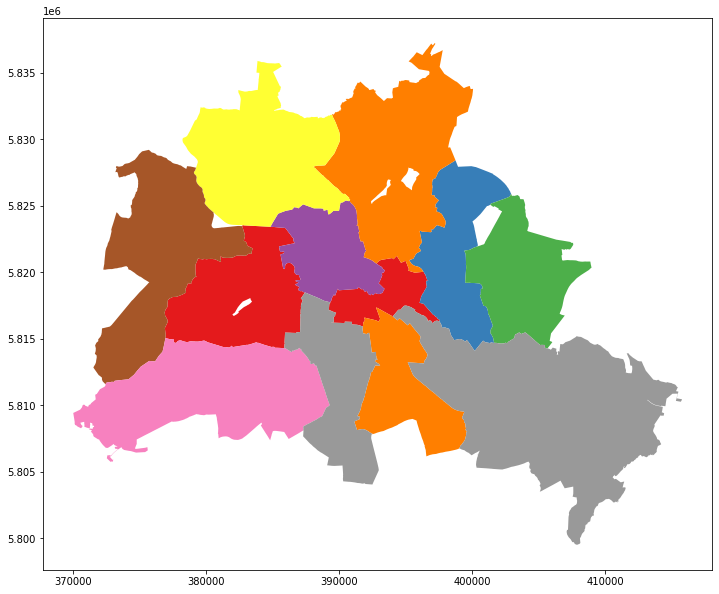

In [58]:
df.dissolve(by='Bezirk', as_index=False).plot(figsize=(12,12), column='Bezirk', cmap='Set1')

<Figure size 432x288 with 0 Axes>

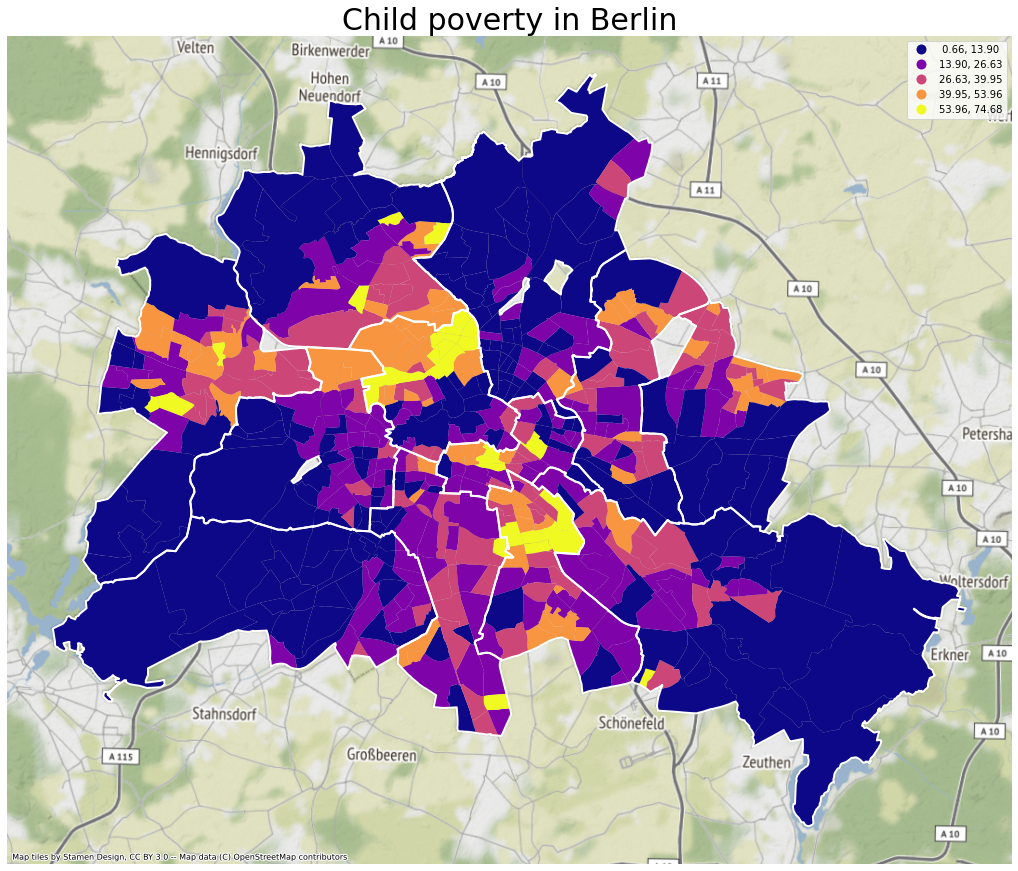

In [80]:
fig = plt.figure()
base = df.dissolve(by='Bezirk',
                   as_index=False).boundary.plot(figsize=(18, 18),
                                                 edgecolor='white',
                                                 linewidth=2)
ax = df.plot(figsize=(16, 16),
             column='Child poverty',
             ax=base,
             cmap='plasma',
             legend=True,
             scheme='NaturalBreaks')
ax.set_axis_off()
ax.set_title('Child poverty in Berlin', fontsize=30)
contextily.add_basemap(ax, crs=df.crs)
plt.savefig(fname='plots/child_pov.png',transparent=False, facecolor='white', bbox_inches="tight")

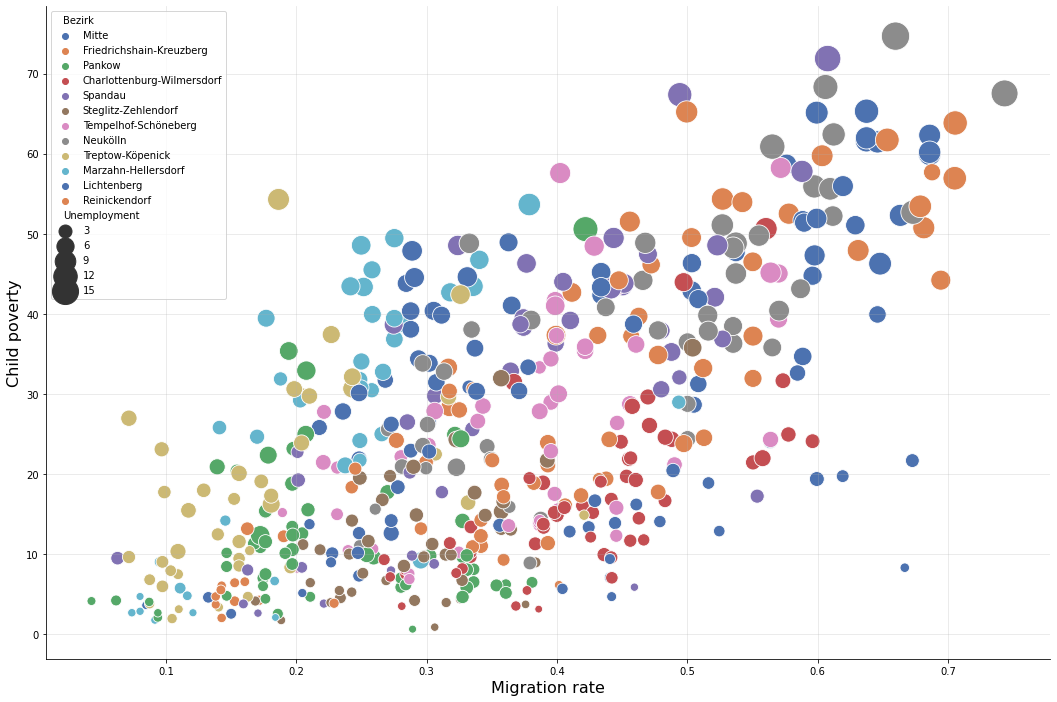

In [71]:
fig = plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x="Migration rate",
                y="Child poverty",
                hue='Bezirk',
                size="Unemployment",
                hue_order=[
                    'Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
                    'Charlottenburg-Wilmersdorf', 'Spandau',
                    'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Neukölln',
                    'Treptow-Köpenick', 'Marzahn-Hellersdorf', 'Lichtenberg',
                    'Reinickendorf'
                ],
                palette=sns.color_palette('deep', 12),
                sizes=(60, 800), legend='brief',
                data=df)
ax.grid(alpha=0.3)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.set_xlabel('Migration rate', fontsize = 16)
ax.set_ylabel('Child poverty', fontsize = 16)
plt.savefig(fname='plots/scatterplot_mig_rate.png',transparent=False, bbox_inches="tight", facecolor='white')

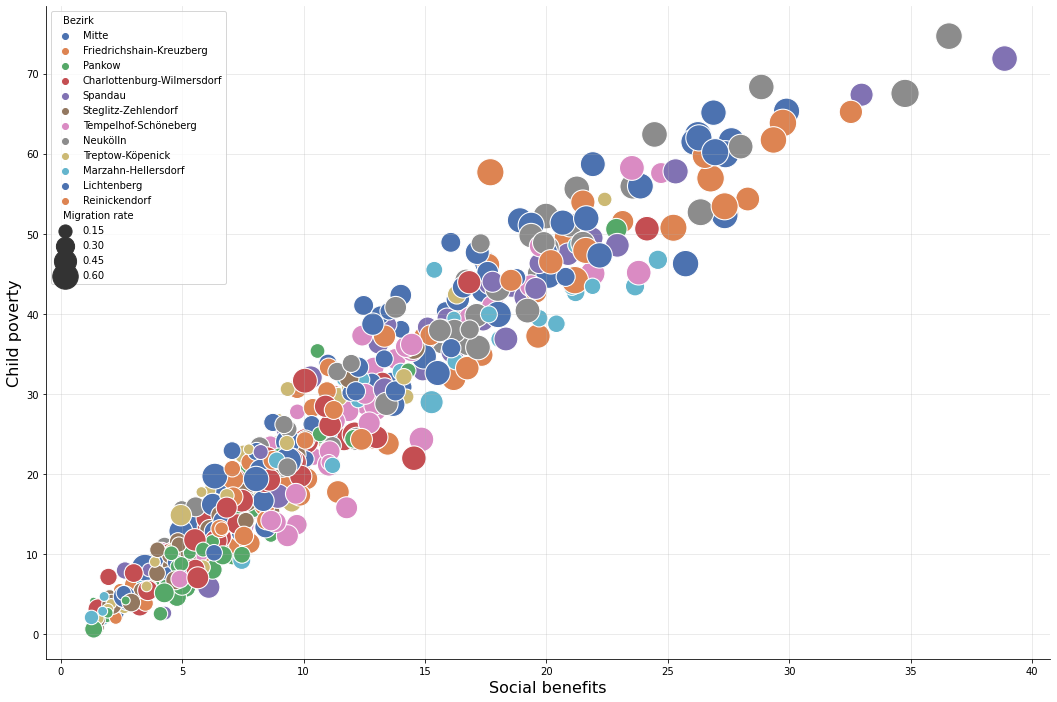

In [29]:
fig = plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x="Social benefits",
                y="Child poverty",
                hue='Bezirk',
                size="Migration rate",
                hue_order=[
                    'Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
                    'Charlottenburg-Wilmersdorf', 'Spandau',
                    'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Neukölln',
                    'Treptow-Köpenick', 'Marzahn-Hellersdorf', 'Lichtenberg',
                    'Reinickendorf'
                ],
                palette=sns.color_palette('deep', 12),
                sizes=(60, 800), legend='brief',
                data=df)
ax.grid(alpha=0.3)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.set_xlabel('Social benefits', fontsize = 16)
ax.set_ylabel('Child poverty', fontsize = 16)
plt.savefig(fname='plots/scatterplot_social_benefits.png',transparent=False, bbox_inches="tight", facecolor='white')

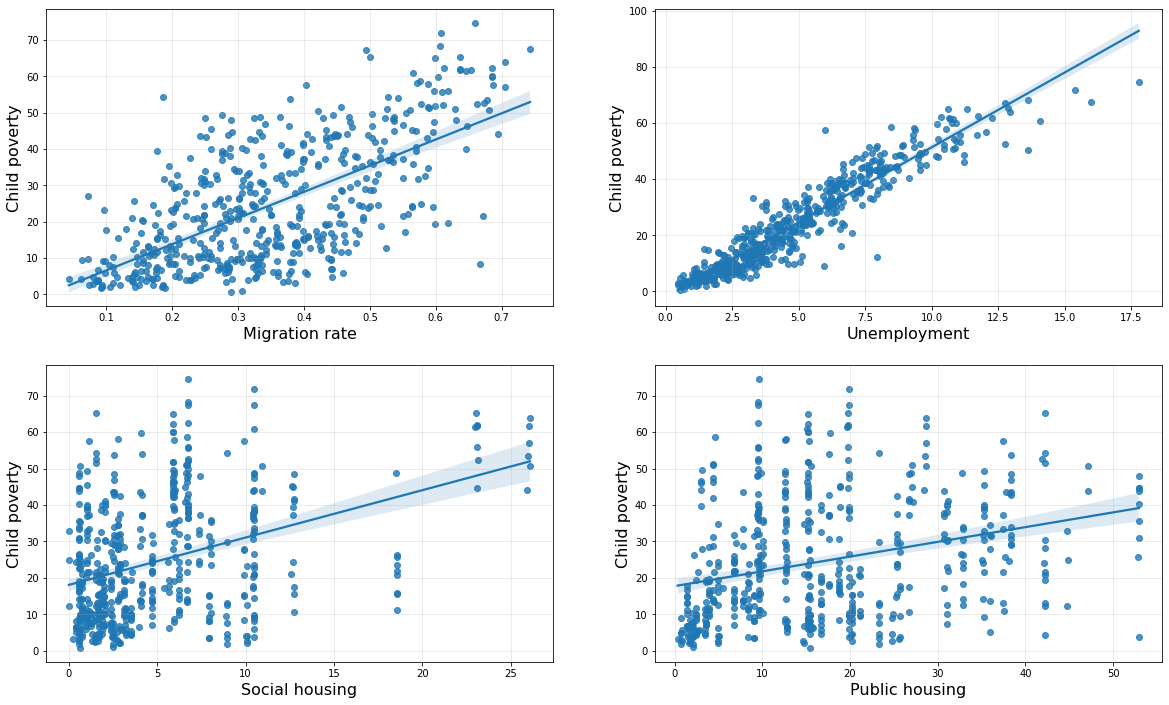

In [28]:
fig=plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.regplot(df['Migration rate'], df['Child poverty'], fit_reg=True)
ax1.grid(alpha=0.3)
ax1.set_xlabel('Migration rate', fontsize=16)
ax1.set_ylabel('Child poverty', fontsize=16)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.regplot(df['Unemployment'], df['Child poverty'], fit_reg=True)
ax2.grid(alpha=0.3)
ax2.set_xlabel('Unemployment', fontsize=16)
ax2.set_ylabel('Child poverty', fontsize=16)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.regplot(df['Social housing'], df['Child poverty'], fit_reg=True)
ax3.grid(alpha=0.3)
ax3.set_xlabel('Social housing', fontsize=16)
ax3.set_ylabel('Child poverty', fontsize=16)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.regplot(df['Public housing'], df['Child poverty'], fit_reg=True)
ax4.grid(alpha=0.3)
ax4.set_xlabel('Public housing', fontsize=16)
ax4.set_ylabel('Child poverty', fontsize=16)

plt.savefig(fname='plots/4_scatterplots.png',transparent=False, bbox_inches="tight", facecolor='white')

In [30]:
clustering = gpd.read_file('../raw_data/for_models/cluster_gdf.shp')

In [31]:
from sklearn.preprocessing import robust_scale
clustering['child_pov'] = robust_scale(clustering['child_pov'])

In [32]:
clustering['education'] = robust_scale(clustering['education'])

In [33]:
migration = ['mig_rate', 'child_pov']

In [34]:
infrastructure = [
    'culture', 'stations', 'kita', 'Gymnasium', 'outdoor_fa', 'outdoor_le',
    'vegpm20', 'social_hou', 'public_hou'
]

In [35]:
social_index = ['unemployme', 'welfare']

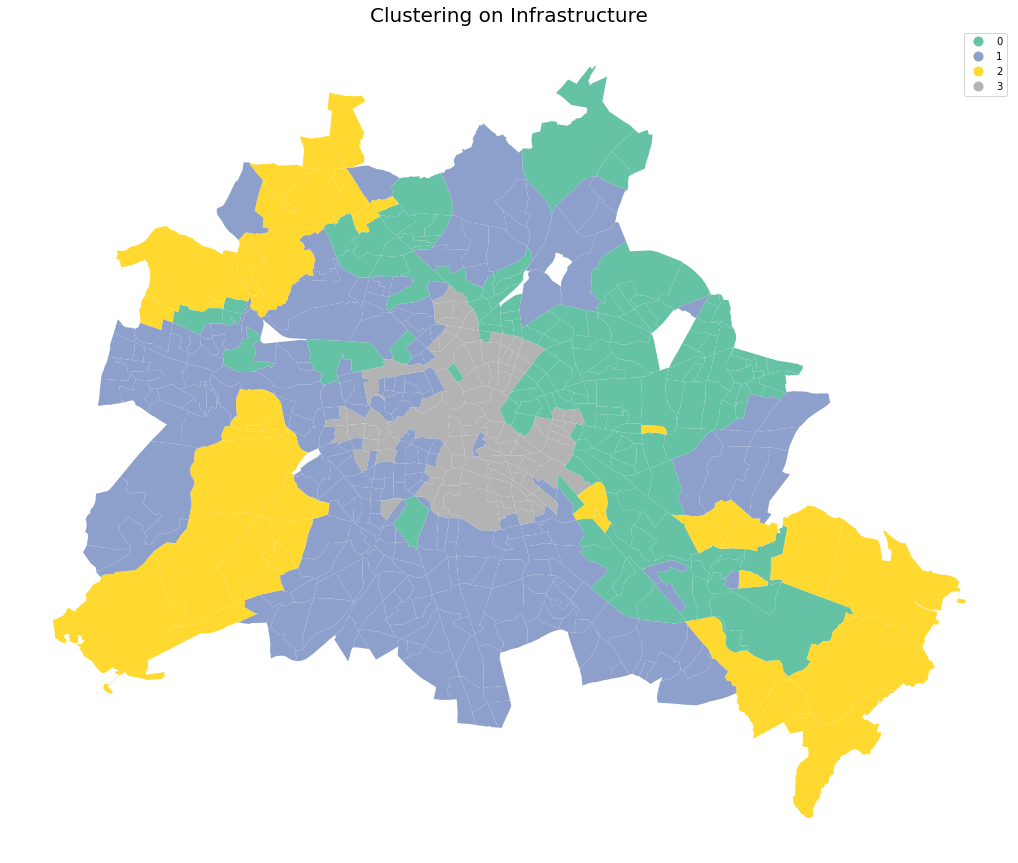

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(clustering[infrastructure])
# Assign labels into a column
clustering['label'] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(18,18))
clustering.plot(
    column="label", categorical=True, legend=True, linewidth=0, ax=ax, cmap='Set2'
)
# Remove axis
ax.set_axis_off()
ax.set_title("Clustering on Infrastructure", fontsize=20)
# Display the map
plt.savefig(fname='plots/cluster_infrastructure.png',facecolor='white', bbox_inches="tight")
plt.show()

In [47]:
infra_col = [
    'Culture', 'Train stations', 'Kita', 'Gymnasium', 'Outdoor facilities',
    'Outdoor leisure spots', 'Vegetation', 'Social housing', 'Public housing'
]

In [ ]:
def highlight_col(x):
    if x.name in added_columns:
        return ['background-color: #67c5a4']*x.shape[0]
    elif x.name in dropped_columns:
        return ['background-color: #ff9090']*x.shape[0]
    else:
        return ['background-color: None']*x.shape[0]

In [64]:
k5means = clustering.groupby("label")[infrastructure].mean()
k5means.columns = infra_col
k5means.T.round(3)

label,0,1,2,3
Culture,0.123,0.140,-0.117,2.357
Train stations,0.858,-0.202,0.046,0.864
Kita,0.082,0.038,-0.439,1.116
Gymnasium,-0.387,-0.348,-0.528,0.093
Outdoor facilities,0.435,-0.172,-0.254,1.009
Outdoor leisure spots,0.750,-0.085,-0.146,0.295
Vegetation,0.198,0.128,3.551,-0.147
Social housing,-0.266,0.680,-0.015,0.631
Public housing,0.934,-0.238,-0.266,-0.162
